# Homework 1 - Biomath 208

Simon Lee (simonlee711@g.ucla.edu)

# 1 Visualizing Image Annotations

This exercise will help you understand how to work with window
and level, color mapping, and transparency.
Your goal is to take a grayscale image, and a set of integer valued
labels, and produce a visualization as shown in Fig. 1 below.

### 1.1 Loading Data

Use numpy for visualization, matplotlib for plotting, and nibabel for
loading data as shown below. Download data from the `hw1_data`
folder on the course website.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
# load image and labels as numpy arrays
I = np.array(nib.load('./hw1_data/mr_image.img').get_fdata())
L = np.array(nib.load('./hw1_data/mr_labels.img').get_fdata())

### 1.2 Display the Slices

Extract a single 2D slice through the brain in the coronal plane. Rotate
the images so they are “right side up”, and display each image using
plt.imshow. Below is an example that does this in the sagittal plane.

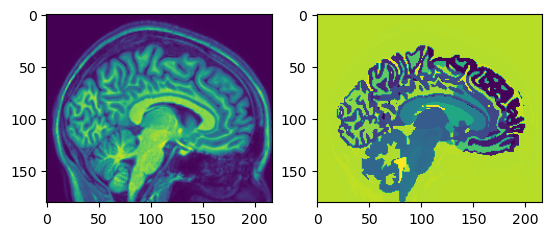

In [2]:
# choose a slice and a plane to work with
s = I.shape[0]//2 + 5
Is = np.rot90(I[s].squeeze())
Ls = np.rot90(L[s].squeeze())
f,ax = plt.subplots(1,2)
ax[0].imshow(Is)
ax[1].imshow(Ls)

### 1.3 Use windowing to normalize your MR images

Display a histogram of pixel values in your MR image. Chose a lower
value and an upper value, and use this to apply windowing to your
data. That is, transform your image so that any pixel less than or
equal to the lower value has the value 0, any pixel greater than or
equal to the upper value has the value 1, and other pixels are scaled
biomath 208, homework 1 3
linearly between. Note, do not use the vmin and vmax arguments of
the imshow function. An example is shown in Fig. 3.

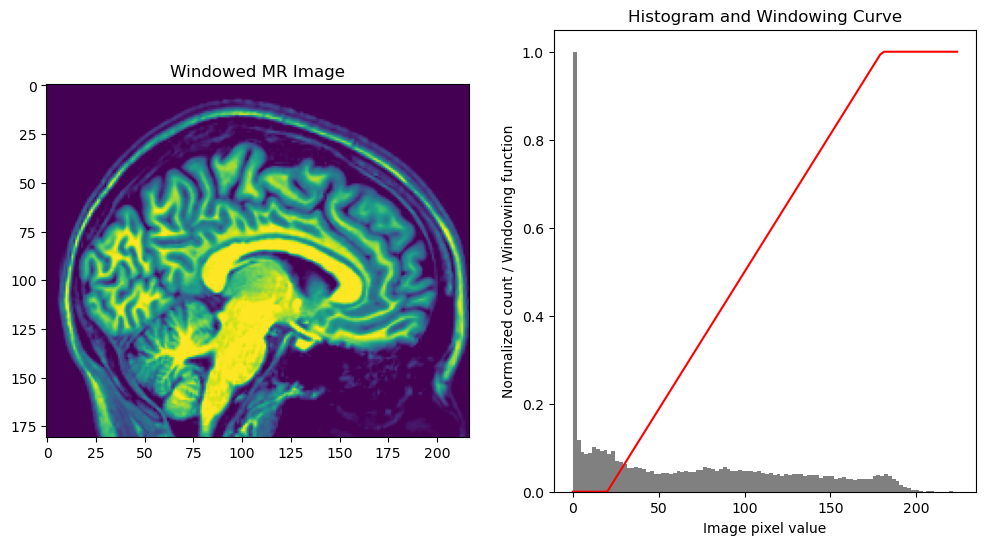

In [29]:
# Calculate the windowed image
vmin = 20
vmax = 180

windowed_I = (Is - vmin) / (vmax - vmin)
windowed_I[Is < vmin] = 0
windowed_I[Is > vmax] = 1

# Plot histogram and windowing function
counts, bins = np.histogram(Is.ravel(), bins=100)
counts = counts / np.max(counts)  # Normalize the histogram
bin_centers = (bins[:-1] + bins[1:]) / 2.0
bin_width = bins[1] - bins[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the windowed image
ax[0].imshow(windowed_I)
ax[0].set_title('Windowed MR Image')

# Windowing curve
y = np.clip((bins - vmin) / (vmax - vmin), 0, 1)
ax[1].bar(bin_centers, counts, width=bin_width, color=(0.5, 0.5, 0.5))
ax[1].plot(bins, y, color='red')
ax[1].set_title('Histogram and Windowing Curve')
ax[1].set_xlabel('Image pixel value')
ax[1].set_ylabel('Normalized count / Windowing function')

plt.show()

### 1.4 Convert labels to RGB

Initialize three new arrays, the same size as your slice, to store red,
green, and blue values as floating point numbers between 0 and 1.
Find a list of unique labels in your label image using np.unique.
For each unique label, identify all the pixels in your slice with this label, stored as a binary mask: BinaryMask = (LabelImage == ValueOfThisLabel).
Assign a random number between 0 and 1 to your red green and
blue arrays: `RedImage[BinaryMask] = np.random.rand()`.
Stack your arrays along the last axis to create an RGB image:
`RGB = np.stack((RedImage,GreenImage,BlueImage),-1)`, and
display it. It should look like Fig. 4

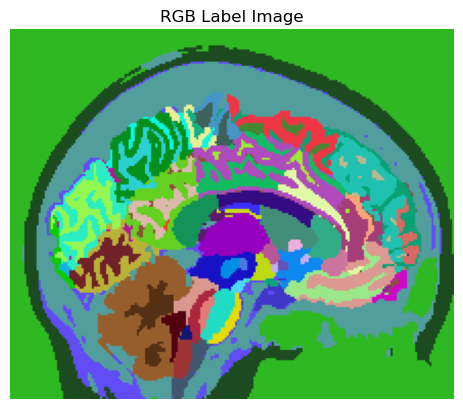

In [30]:
RedImage = np.zeros_like(Ls, dtype=np.float32)
GreenImage = np.zeros_like(Ls, dtype=np.float32)
BlueImage = np.zeros_like(Ls, dtype=np.float32)

# Find unique labels
unique_labels = np.unique(Ls)

# Assign random colors to each label
for label in unique_labels:
    BinaryMask = (Ls == label)
    RedImage[BinaryMask] = np.random.rand()
    GreenImage[BinaryMask] = np.random.rand()
    BlueImage[BinaryMask] = np.random.rand()

# Stack the arrays to create an RGB image
RGB = np.stack((RedImage, GreenImage, BlueImage), axis=-1)

# Display the RGB image
plt.imshow(RGB)
plt.title("RGB Label Image")
plt.axis('off')  # Turn off the axis
plt.show()


### 1.5 Combine Data with transparency

Chose a value between 0 and 1 for the opacity of your label overlay,
called alpha. Combine your windowed MR image and your color
labeled image into a new RGB image. You should take a linear combination of them, where the first has a weight of 1-alpha and the
second has a weight of alpha. You will have to add an additional axis
to your MR image so it has size (rows x columns x 1). An example
is shown in Fig. 5.

In [ ]:
# Choose an alpha value
alpha = 0.1

# Add an additional axis to the windowed MR image so that it can be combined with the RGB image
windowed_MR_image_expanded = Ls[:, :, np.newaxis]

# Ensure the MR image has three channels (it's still grayscale)
windowed_MR_image_rgb = np.repeat(windowed_MR_image_expanded, 3, axis=2)

# Combine the windowed MR image with the RGB label image
combined_image = (1 - alpha) * windowed_MR_image_rgb + alpha * RGB

# Display the combined image
plt.imshow(combined_image)
plt.title(f"Combined MR and Label Image (Alpha = {alpha})")
plt.axis('off')  # Turn off the axis
plt.show()

### 1.6 Add Outlines

Create a binary mask that is 1 everywhere a pixel has a different label
than one of its neighbors and display it.
Use this mask to add outlines to your image. Feel free to use your
artistic license, it need not look exactly like the output shown in
Fig. 1. That figure used the above mask to specify opacity on a per
pixel basis.

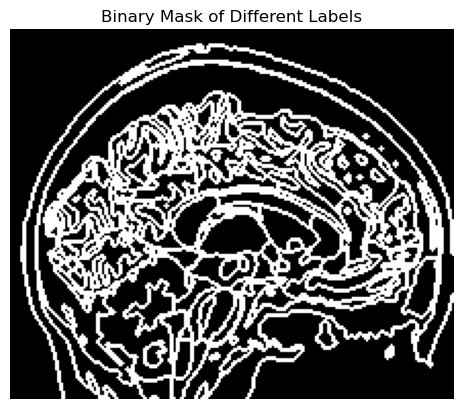

In [38]:
padded_Ls = np.pad(Ls, pad_width=1, mode='edge')
binary_mask = np.zeros_like(Ls, dtype=np.int_)

# Using the same approach to create the mask as before

# Iterate over the padded array and compare each pixel to its neighbors
for i in range(1, padded_Ls.shape[0] - 1):
    for j in range(1, padded_Ls.shape[1] - 1):
        # If the pixel is different from any of its neighbors, mark it in the mask
        if (padded_Ls[i, j] != padded_Ls[i - 1, j]) or \
           (padded_Ls[i, j] != padded_Ls[i + 1, j]) or \
           (padded_Ls[i, j] != padded_Ls[i, j - 1]) or \
           (padded_Ls[i, j] != padded_Ls[i, j + 1]):
            binary_mask[i - 1, j - 1] = 1

# Display the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Mask of Different Labels")
plt.axis('off')
plt.show()

# 3 Polynomial inner products

In class we showed that polynomials from $\mathbb{R} \rightarrow \mathbb{R}$, of a specified order $d - 1$, form a $d$ dimensional vector space $V$. We introduced the basis vectors (which are polynomial functions) $e_i(x) = x^i$ for $i \in \{0, \ldots, d - 1\}$ (where the superscript refers to an exponent and $x^0 = 1$).

For $f, g \in V$, we considered the $L_2$ inner product on the interval [0,1]; $$\langle f, g \rangle = \int_{0}^{1} f(x)g(x)dx$$. We showed that in the basis above, this inner product can be written as a Hilbert Matrix: $g_{ij} = \langle e_i, e_j \rangle = \frac{1}{i+j+1}$. For $d = 3$, find a basis such that this inner product can be written as the identity matrix. In this exercise, fix $e_0(x) = 1$.

# 4 Surfaces as Covectors 

In this exercise we will work with triangulated surfaces as covectors.
Surfaces will act on smooth vector fields through flux integrals. This
will extend our work in class of curves as covectors that acted on
smooth vector fields as line integrals. Here we will study the hippocampus, a subcortical structure important for learning and memory, and involved in neurodegeneration
in diseases like Alzheimer’s. A T1 MRI with hippocampus highlighted is shown in Fig. 7.

### 4.1 Load and visualize surface data

You will work with the surface text files in the hw1_data folder. They
are stored in the format discussed in class. The first line contains the
number of vertices and the number of triangles. This is followed by a
list of vertices, and a list of tringles as triples of integer indices. You
can use the function below to load vertices and faces into numpy
arrays:

In [13]:
def load_surface(fname):
    verts = []
    faces = []
    with open(fname,'rt') as f:
        for i,line in enumerate(f):
            line = line.strip()
            if i == 0:
                nv,nf = [int(value) for value in line.split()]
                continue
            if len(verts) < nv:
                verts.append([float(value) for value in line.split()])
            else:
                faces.append([int(value) for value in line.split()])
        
        return np.array(verts),np.array(faces)

You can load all the surfaces into lists as follows:

In [14]:
# get filenames
import glob
files = glob.glob('hw1_data/*surface.txt')
files.sort()

# load into lists

v = []
f = []
for fi in files:
    vf = load_surface(fi)
    v.append(vf[0])
    f.append(vf[1])

Visualize one surface of your choice using either matplotlib or
mayavi. Below is an example to show all the surfaces in the dataset
visualized with matplotlib, and the result is shown in Fig. 8:

(-13.605710264656192, 16.394289735343808)

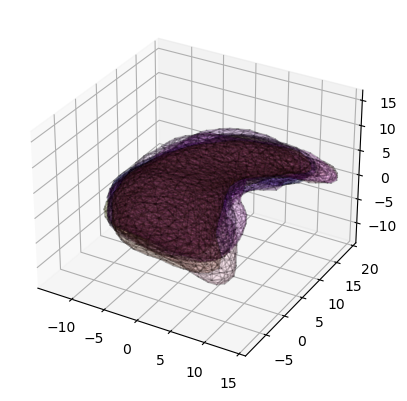

In [15]:
# draw with matplotlib
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(v)):
    fc = np.random.rand(4)
    fc[-1] = 0.1
    ec = np.array([0.0,0.0,0.0,0.1])
    mesh = Poly3DCollection(v[i][f[i]],edgecolor=ec,facecolor=fc)
    ax.add_collection3d(mesh)
center = np.mean([np.mean(vi,0) for vi in v],0)
spread = 15
ax.set_xlim(center[0]-spread,center[0]+spread)
ax.set_ylim(center[1]-spread,center[1]+spread)
ax.set_zlim(center[2]-spread,center[2]+spread)

Below is an example to show all the surfaces in the dataset visualized with mayavi, and the result is shown in Fig. 9:

In [9]:
import mayavi
from mayavi import mlab

mlab.init_notebook()
fig = mlab.figure(0,bgcolor=(1.,1.,1.),fgcolor=(0.,0.,0.))
mlab.clf()
for i in range(len(v)):
    fc = tuple(np.random.rand(3))
    mlab.triangular_mesh(v[i][:,0],v[i][:,1],v[i][:,2],f[i],color=fc,opacity=0.1)
mlab.axes()
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In either case, you can pan and rotate the 3D data interactively

# Compute face centers

Write a function that takes as input an array of vertices, and a list of
faces, and returns an array of face centers. If there are nv vertices and
nf faces, your vertex array should be size nv x 3 floats, your face
array should be size nf x 3 integers, and your output centers should
be size nf x 3 floats.
Visualize your face centers over your surface. Use scatter in
matplotlib or points3d in mayavi. This should look something like

In [16]:
import numpy as np

def compute_face_centers(vertices, faces):
    # vertices is an array of shape (nv, 3)
    # faces is an array of shape (nf, 3) where each row consists of indices into the vertices array
    centers = np.zeros((len(faces), 3))
    for i, face in enumerate(faces):
        centers[i] = np.mean(vertices[face], axis=0)
    return centers


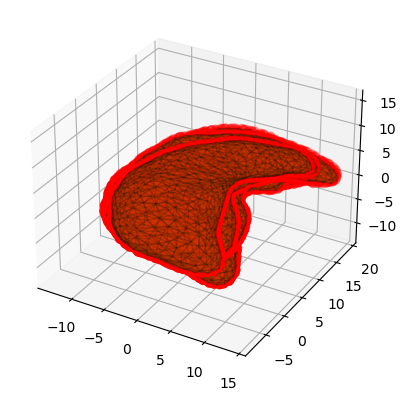

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(v)):
    # Compute face centers
    centers = compute_face_centers(v[i], f[i])

    # Draw mesh
    mesh = Poly3DCollection(v[i][f[i]])
    mesh.set_facecolor((0, 1, 0, 0.1))  # green with transparency
    mesh.set_edgecolor((0, 0, 0, 0.1))
    ax.add_collection3d(mesh)

    # Draw face centers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color='red', s=50)

# Set axis limits based on the center of all vertices
center = np.mean(np.vstack(v), axis=0)
spread = 15
ax.set_xlim(center[0] - spread, center[0] + spread)
ax.set_ylim(center[1] - spread, center[1] + spread)
ax.set_zlim(center[2] - spread, center[2] + spread)

plt.show()


# 4.3 Compute face normals

Write a function that takes as input an array of vertices and an array of faces, and returns the area weighted normals. Your output
normals should be size nf x 3 floats again.
You can compute an area weighted normal by taking the cross
product of edges and dividing by 2. Note that handedness is important when defining edges so keep the order consistent. For example,
define the first edge as the vector from the first to the second vertex,
and the second edge as the vector from the first to the third vertex,
where the order of vertices is specified by your faces.
Visualize your normal vectors over your surface. Use quiver in
matplotlib or quiver3d in mayavi. This should look something like
what is shown in Fig. 11.

In [18]:
import numpy as np

def area_weighted_normals(vertices, faces):
    # vertices is an array of shape (nv, 3)
    # faces is an array of shape (nf, 3) where each row contains indices into the vertices array
    normals = np.zeros((len(faces), 3))
    for i, face in enumerate(faces):
        v1, v2, v3 = vertices[face[0]], vertices[face[1]], vertices[face[2]]
        edge1 = v2 - v1
        edge2 = v3 - v1
        normal = np.cross(edge1, edge2)
        normals[i] = normal * 0.5  # Multiplying by 0.5 as the area of the triangle is half the magnitude of the cross product
    return normals

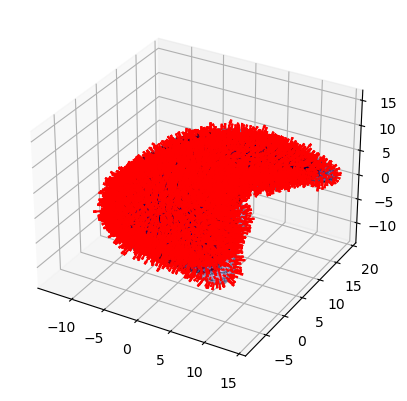

In [19]:
# Draw with Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(v)):
    # Compute face centers
    centers = compute_face_centers(v[i], f[i])

    # Compute normals
    normals = area_weighted_normals(v[i], f[i])

    # Draw mesh
    mesh = Poly3DCollection(v[i][f[i]])
    mesh.set_facecolor((0, 0, 1, 0.1))  # blue with transparency
    mesh.set_edgecolor((0, 0, 0, 0.1))
    ax.add_collection3d(mesh)

    # Draw normals
    ax.quiver(centers[:, 0], centers[:, 1], centers[:, 2], normals[:, 0], normals[:, 1], normals[:, 2], length=1, color='r')

# Set axis limits based on the center of all vertices
center = np.mean(np.vstack(v), axis=0)
spread = 15
ax.set_xlim(center[0] - spread, center[0] + spread)
ax.set_ylim(center[1] - spread, center[1] + spread)
ax.set_zlim(center[2] - spread, center[2] + spread)

plt.show()

### 4.4. compute inner product

Write a function that uses a Gaussian kernel $k$ of stndard devation 3 to define an inner product between two surfaces. For surfaces $v$
 and $\mu$ with centers $c^v$ and $c^\mu$, and normals $A^\mu$ and $A^v$, this takes the form:

 $$gv*(v,\mu) = \sum^{n^v}_{i=1} \sum^{n^\mu}_{j=1} k(c^{v}_{i} - c^{\mu}_{j})A^{v}_i * A^{\mu}_j$$

 where $n^v$ and $n^\mu$ are the number of centers (also the number of normals) in each surface. Your input should be two arrays storing centers and two arrays storing normals. Your outpit should be a single number. Compute the inner product between each pair of surfaces.

In [20]:
import numpy as np

def gaussian_kernel(x, sigma):
    return np.exp(-np.linalg.norm(x)**2 / (2 * sigma**2))

def compute_inner_product(centers_v, normals_v, centers_mu, normals_mu, sigma=3):
    nv = len(centers_v)
    nmu = len(centers_mu)
    inner_product = 0.0
    
    for i in range(nv):
        for j in range(nmu):
            distance = centers_v[i] - centers_mu[j]
            kernel_val = gaussian_kernel(distance, sigma)
            normal_dot_product = np.dot(normals_v[i], normals_mu[j])
            inner_product += kernel_val * normal_dot_product
    
    return inner_product

In [21]:
# Now, compute the inner product for each pair of surfaces
inner_products = []
for i in range(len(v)):
    for j in range(i+1, len(v)):  # Avoid computing the inner product of a surface with itself
        centers_v = compute_face_centers(v[i], f[i])
        normals_v = area_weighted_normals(v[i], f[i])
        centers_mu = compute_face_centers(v[j], f[j])
        normals_mu = area_weighted_normals(v[j], f[j])
        inner_product = compute_inner_product(centers_v, normals_v, centers_mu, normals_mu)
        inner_products.append(inner_product)

inner_products


[39484.80904631103,
 41083.69336312373,
 41129.509654976355,
 40606.144916181234,
 39115.62267435524,
 40154.79971251015,
 42097.10294162761,
 35312.67798891423,
 41373.26335623847,
 41246.06439993925,
 43382.632784485926,
 38602.605625964745,
 38633.40624896018,
 43525.83712097079,
 33730.40670168266,
 43198.24884344816,
 44930.836147186346,
 41317.1340038564,
 41985.29977182143,
 46473.65764789246,
 39050.34953820231,
 43230.10723938116,
 42003.758656850696,
 41822.320454449386,
 43746.90546932264,
 37371.35778061449,
 40162.00401458814,
 41007.01306375446,
 47950.272314689195,
 38218.08879479185,
 39591.43743617672,
 41667.73771077722,
 34779.61174995105,
 43505.58858142792,
 38285.340730355216,
 39667.94796782801]